In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('cancer_data.csv')
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


<AxesSubplot:xlabel='age', ylabel='breast'>

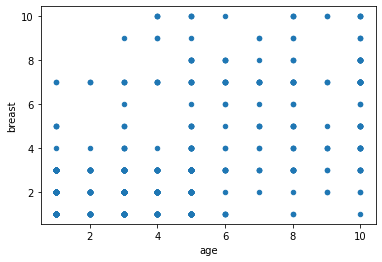

In [6]:
df.plot.scatter(x='age',y='breast')

In [12]:
import statsmodels.api as sm

y= df['Class']
x = sm.add_constant(df[['age']])
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.335639
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.482     
Dependent Variable: Class            AIC:              462.4830  
Date:               2021-12-26 19:09 BIC:              471.5360  
No. Observations:   683              Log-Likelihood:   -229.24   
Df Model:           1                LL-Null:          -442.18   
Df Residuals:       681              LLR p-value:      1.2894e-94
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -5.1101     0.3789   -13.4853   0.0000   -5.8528   -4.3674
age       0.9304     0.0742    12.5423   0.0000    0.7850 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression()

In [17]:
y_pred = logreg.predict(x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x, y)))

Accuracy of logistic regression classifier on test set: 0.86


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[424  20]
 [ 76 163]]


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       444
           1       0.89      0.68      0.77       239

    accuracy                           0.86       683
   macro avg       0.87      0.82      0.84       683
weighted avg       0.86      0.86      0.85       683



In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

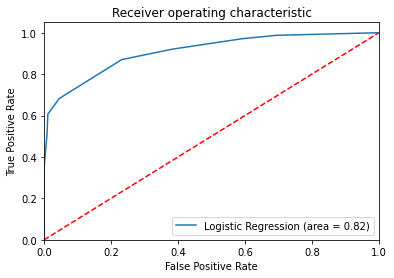

In [21]:
logit_roc_auc = roc_auc_score(y, logreg.predict(x))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()